# DATA620 Project 3
Date: 2018-07-08

Team 6: Sang Yoon (Andy) Hwang, Santosh Manjrekar, Dhananjay Kumar, Matheesha Thambeliyagodage

In [15]:
import nltk
import random
from nltk.corpus import names
#nltk.download('names')

In [16]:
names = nltk.corpus.names
names.fileids()

['female.txt', 'male.txt']

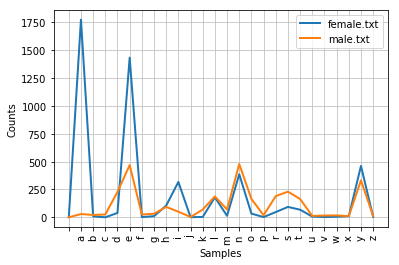

In [17]:
cf = nltk.ConditionalFreqDist(
    (fileid, name[-1])
    for fileid in names.fileids()
    for name in names.words(fileid))
cf.plot()

#Note that name[-1] is the last letter of first name.
#From Conditional Frequency Distribution, we know that names ending with a, e or i are usually female, names ending with h and l can be both male and female and names ending with k, o, r, s and t are more likely to be male.

In [18]:
#From the result above, we know that using the last letter of first name helps to classify genders. 
#we will start with this feature and compare with other features to improve accuracy if we need to.

names = ([(name, 'male') for name in names.words('male.txt')] +
         [(name, 'female') for name in names.words('female.txt')])

random.shuffle(names)

In [19]:
test_names = names[:500]
devtest_names = names[500:1000]
train_names = names[1000:]

In [20]:
names

[('Annadiane', 'female'),
 ('Yalonda', 'female'),
 ('Abdulkarim', 'male'),
 ('Nissie', 'female'),
 ('Mignon', 'female'),
 ('Sibylle', 'female'),
 ('Rolland', 'male'),
 ('Celestyn', 'female'),
 ('Floria', 'female'),
 ('Esau', 'male'),
 ('Susanna', 'female'),
 ('Katharyn', 'female'),
 ('Malina', 'female'),
 ('Kathi', 'female'),
 ('Cassey', 'female'),
 ('Archy', 'male'),
 ('Moya', 'female'),
 ('Rudd', 'male'),
 ('Faythe', 'female'),
 ('Felicle', 'female'),
 ('Alejandro', 'male'),
 ('Francis', 'female'),
 ('Clementia', 'female'),
 ('Otho', 'male'),
 ('Elfrida', 'female'),
 ('Emelina', 'female'),
 ('Merlin', 'male'),
 ('Misty', 'female'),
 ('Isadore', 'male'),
 ('Anica', 'female'),
 ('Meggi', 'female'),
 ('Ernaline', 'female'),
 ('Cecilia', 'female'),
 ('Waylon', 'male'),
 ('Gibb', 'male'),
 ('Kasey', 'female'),
 ('Carine', 'female'),
 ('Christofer', 'male'),
 ('Esteban', 'male'),
 ('Tiphanie', 'female'),
 ('Rubetta', 'female'),
 ('Avraham', 'male'),
 ('Chickie', 'female'),
 ('Deonne', 'fem

In [21]:
len(test_names), len(devtest_names), len(train_names), len(names)

(500, 500, 6944, 7944)

# Classifer using Naive Bayes

# feature 1. Last letter only

In [22]:
def feature_1(name):
    name=name.lower()
    return {
        'last_1_letter': name[-1]
        }
feature_1("Andy")

{'last_1_letter': 'y'}

In [23]:
train_set = [(feature_1(n), g) for (n,g) in train_names]
devtest_set = [(feature_1(n), g) for (n,g) in devtest_names]
test_set = [(feature_1(n), g) for (n,g) in test_names]
nb = nltk.NaiveBayesClassifier.train(train_set) 
nltk.classify.accuracy(nb, devtest_set)

#devset accuracy

0.74

In [24]:
nltk.classify.accuracy(nb, test_set)

#testset accuracy

0.802

# feature 2. Last 2 letters

In [25]:
def feature_2(name):
    name=name.lower()
    return {
        'last_2_letters': name[-2:]
        }
feature_2("Andy")

{'last_2_letters': 'dy'}

In [26]:
train_set = [(feature_2(n), g) for (n,g) in train_names]
devtest_set = [(feature_2(n), g) for (n,g) in devtest_names]
test_set = [(feature_2(n), g) for (n,g) in test_names]
nb2 = nltk.NaiveBayesClassifier.train(train_set) 
nltk.classify.accuracy(nb2, devtest_set)

#devset accuracy

0.744

In [27]:
nltk.classify.accuracy(nb2, test_set)

#testset accuracy

0.816

# feature 3. 2 letters as suffix

In [28]:
 def feature_3(name):
        name=name.lower()
        return {
            'suffix1': name[-1:],
            'suffix2': name[-2:]
               }
feature_3("Andy")

{'suffix1': 'y', 'suffix2': 'dy'}

In [31]:
train_set = [(feature_3(n), g) for (n,g) in train_names]
devtest_set = [(feature_3(n), g) for (n,g) in devtest_names]
test_set = [(feature_3(n), g) for (n,g) in test_names]
nb3 = nltk.NaiveBayesClassifier.train(train_set) 
nltk.classify.accuracy(nb3, devtest_set)

#devset accuracy

0.752

In [32]:
nltk.classify.accuracy(nb3, test_set)

#testset accuracy

0.798

# Checking the error for features

# feature_1 error checking

In [33]:
errors = []
for (name, tag) in devtest_names:
    guess = nb.classify(feature_1(name))
    if guess != tag:
        errors.append((tag, guess, name))

In [37]:
for (tag, guess, name) in sorted(errors):
    print('correct=%-8s guess=%-8s name=%-30s' % (tag, guess, name))
#We can see that name ending -y tends to be misunderstood as female when it is actually male name and -l as male when it is actullay female name.

correct=female   guess=male     name=Adriaens                      
correct=female   guess=male     name=Alleen                        
correct=female   guess=male     name=Angil                         
correct=female   guess=male     name=Annabal                       
correct=female   guess=male     name=April                         
correct=female   guess=male     name=Ardis                         
correct=female   guess=male     name=Ariel                         
correct=female   guess=male     name=Arleen                        
correct=female   guess=male     name=Aurel                         
correct=female   guess=male     name=Bev                           
correct=female   guess=male     name=Bliss                         
correct=female   guess=male     name=Cal                           
correct=female   guess=male     name=Carlin                        
correct=female   guess=male     name=Caroleen                      
correct=female   guess=male     name=Carolin    

In [42]:
nb.show_most_informative_features()

Most Informative Features
           last_1_letter = 'k'              male : female =     43.9 : 1.0
           last_1_letter = 'a'            female : male   =     32.5 : 1.0
           last_1_letter = 'f'              male : female =     24.0 : 1.0
           last_1_letter = 'p'              male : female =     19.6 : 1.0
           last_1_letter = 'v'              male : female =     15.1 : 1.0
           last_1_letter = 'm'              male : female =     12.9 : 1.0
           last_1_letter = 'd'              male : female =      9.7 : 1.0
           last_1_letter = 'o'              male : female =      8.4 : 1.0
           last_1_letter = 'r'              male : female =      7.4 : 1.0
           last_1_letter = 'w'              male : female =      5.8 : 1.0


In [36]:
#From likelihood ratio, we know that name ending with 'a' is female 32.5 times more often than it is male and name ending with 'k' is male 43.9 times more often than it is feamle.

# feature_2 error checking

In [53]:
errors = []
for (name, tag) in devtest_names:
    guess = nb2.classify(feature_2(name))
    if guess != tag:
        errors.append((tag, guess, name))

In [38]:
for (tag, guess, name) in sorted(errors):
    print('correct=%-8s guess=%-8s name=%-30s' % (tag, guess, name))

correct=female   guess=male     name=Adriaens                      
correct=female   guess=male     name=Alleen                        
correct=female   guess=male     name=Angil                         
correct=female   guess=male     name=Annabal                       
correct=female   guess=male     name=April                         
correct=female   guess=male     name=Ardis                         
correct=female   guess=male     name=Ariel                         
correct=female   guess=male     name=Arleen                        
correct=female   guess=male     name=Aurel                         
correct=female   guess=male     name=Bev                           
correct=female   guess=male     name=Bliss                         
correct=female   guess=male     name=Cal                           
correct=female   guess=male     name=Carlin                        
correct=female   guess=male     name=Caroleen                      
correct=female   guess=male     name=Carolin    

In [41]:
nb2.show_most_informative_features()

Most Informative Features
          last_2_letters = 'na'           female : male   =     95.4 : 1.0
          last_2_letters = 'ld'             male : female =     37.9 : 1.0
          last_2_letters = 'ia'           female : male   =     36.9 : 1.0
          last_2_letters = 'sa'           female : male   =     35.4 : 1.0
          last_2_letters = 'rt'             male : female =     28.6 : 1.0
          last_2_letters = 'us'             male : female =     27.5 : 1.0
          last_2_letters = 'ra'           female : male   =     25.3 : 1.0
          last_2_letters = 'ta'           female : male   =     24.1 : 1.0
          last_2_letters = 'rd'             male : female =     24.0 : 1.0
          last_2_letters = 'do'             male : female =     23.6 : 1.0


In [ ]:
#From likelihood ratio, we know that name ending with 'na' is female 95.4 times more often than it is male and name ending with 'us' is male 27.5 times more often than it is feamle.

# feature_3 error checking

In [78]:
errors = []
for (name, tag) in devtest_names:
    guess = nb3.classify(feature_3(name))
    if guess != tag:
        errors.append((tag, guess, name))

In [39]:
for (tag, guess, name) in sorted(errors):
    print('correct=%-8s guess=%-8s name=%-30s' % (tag, guess, name))
#Again, just like feature 1 and 2, -y tends to be misunderstood as female when it is male. There is cultural or random effect that affects the accuracy.
#English name can come from many parts of the world; for example, Levy can be Jewish name and it is male not female.

correct=female   guess=male     name=Adriaens                      
correct=female   guess=male     name=Alleen                        
correct=female   guess=male     name=Angil                         
correct=female   guess=male     name=Annabal                       
correct=female   guess=male     name=April                         
correct=female   guess=male     name=Ardis                         
correct=female   guess=male     name=Ariel                         
correct=female   guess=male     name=Arleen                        
correct=female   guess=male     name=Aurel                         
correct=female   guess=male     name=Bev                           
correct=female   guess=male     name=Bliss                         
correct=female   guess=male     name=Cal                           
correct=female   guess=male     name=Carlin                        
correct=female   guess=male     name=Caroleen                      
correct=female   guess=male     name=Carolin    

In [40]:
nb3.show_most_informative_features()

Most Informative Features
                 suffix2 = 'na'           female : male   =     95.4 : 1.0
                 suffix1 = 'k'              male : female =     43.9 : 1.0
                 suffix2 = 'ld'             male : female =     37.9 : 1.0
                 suffix2 = 'ia'           female : male   =     36.9 : 1.0
                 suffix2 = 'sa'           female : male   =     35.4 : 1.0
                 suffix1 = 'a'            female : male   =     32.5 : 1.0
                 suffix2 = 'rt'             male : female =     28.6 : 1.0
                 suffix2 = 'us'             male : female =     27.5 : 1.0
                 suffix2 = 'ra'           female : male   =     25.3 : 1.0
                 suffix2 = 'ta'           female : male   =     24.1 : 1.0


In [ ]:
#From likelihood ratio, we know that name ending with 'na' is female 95.4 times more often than it is male and name ending with 'ld' is male 37.9 times more often than it is feamle.

# Conclusion
We know that there are some factors that affect accuracy.

1. Cultural issue

Names like Levy and Scotti can be easily misuderstood; Jewish and Italian names and these names might not fall into general distribution.

2. Random effects

Obviously, there are always random variables that reduce accuracy as models cannot be perfect; it will never achieve 100% accuracy.

3. Hard to find perfect feature

Manually configuring parameters in each feature can be more of guess-work sometimes. Would be better if we have some automatic function that finds the "best" combination for best accuracy.